In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0 = np.array([0,0]).reshape(-1,1)
num_particles = 100
x0_samples = np.repeat(x0, num_particles, axis=1)

In [3]:
x = np.zeros((2,num_particles,2))
x.shape

(2, 100, 2)

## Original dynamics

In [4]:
def dynamics_step(x):
    vx = 1 + np.random.normal(size=x.shape[1])
    vy = 1 + np.random.normal(size=x.shape[1])
    return x + np.concatenate( (vx.reshape(1,-1), vy.reshape(1,-1)), axis=0 )

In [5]:
T = 100
x = np.zeros((2,num_particles,T))
for t in range(1,T):
    x[:,:,t] = dynamics_step(x[:,:,t-1])

## Biased Dynamics

In [6]:
def compute_cdf_from_pdf(dist):
    cdf = np.cumsum(dist)
    return cdf
def sample_from_cdf(obsx, cdf):
    sample = np.random.uniform()
    index = np.argmin( sample >= cdf )
    return obsx[index]

from scipy.stats import norm
def pdf(obs, mean1, std1, mean2, std2):
    return norm.pdf(obs, mean1, std1) * norm.pdf(obs, mean2, std2)

obsx = np.linspace(-6,6,10000)
pdfx = np.zeros(obsx.size)
mean1 = 1.5; std1 = 1;
mean2 = -0.5; std2 = 1;
for i in range(obsx.size):
    pdfx[i] = pdf(obsx[i], mean1, std1, mean2, std2)
pdfx = pdfx / np.sum(pdfx)

n_samples = 1000
cdfx = compute_cdf_from_pdf(pdfx)
samples = np.zeros(n_samples)
for i in range(n_samples):
    samples[i] = sample_from_cdf(obsx, cdfx)
    
def compute_distribution(t):
    pdfx = np.zeros(obsx.size)
    mean1 = 1; std1 = 1;
    mean2 = 1.0 - t * 0.01; std2 = 1;
    for i in range(obsx.size):
        pdfx[i] = pdf(obsx[i], mean1, std1, mean2, std2)
    pdfx = pdfx / np.sum(pdfx)
    cdfx = compute_cdf_from_pdf(pdfx)
    return cdfx

0.5119471947194724

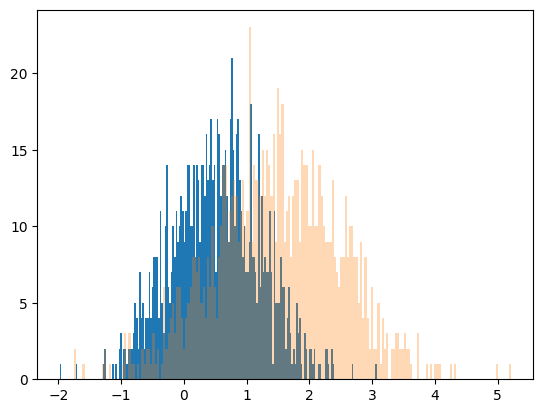

In [7]:
h1 = plt.hist(samples, bins=200)
H2 = plt.hist(np.random.normal(mean1,size=n_samples), bins=200, alpha=0.3)
# H3 = plt.hist(np.random.normal(mean2,size=n_samples), bins=200, alpha=0.3)
np.mean(samples)

In [8]:
samples1 = np.zeros(n_samples)
samples2 = np.zeros(n_samples)
samples12 = np.zeros(n_samples)
for i in range(n_samples):
    sample1 = np.random.normal(mean1)
    while np.abs(sample1-mean1)>1.96*std1:
        sample1 = np.random.normal(mean1)
    samples1[i] = sample1
    
    sample2 = np.random.normal(mean2)
    while np.abs(sample2-mean2)>1.96*std2:
        sample2 = np.random.normal(mean2)
    samples2[i] = sample2
    
    sample12 = sample_from_cdf(obsx, cdfx)
#     while np.abs(sample3-mean3)>1.96*std3:
#         sample3 = np.random.normal(mean3)
    samples12[i] = sample12

0.5119471947194724

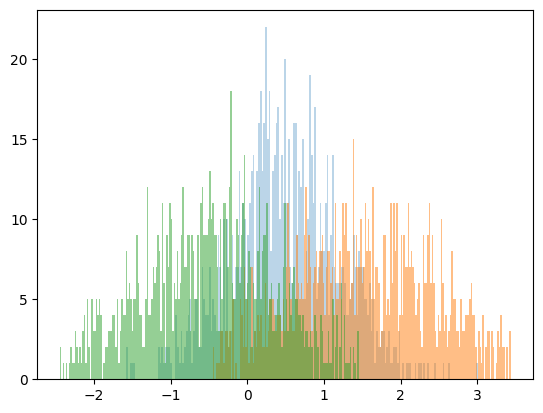

In [9]:
h1 = plt.hist(samples12, bins=200, alpha=0.3)
H2 = plt.hist(samples1, bins=200, alpha=0.5)
H2 = plt.hist(samples2, bins=200, alpha=0.5)
# H3 = plt.hist(np.random.normal(mean2,size=n_samples), bins=200, alpha=0.3)
np.mean(samples)

In [10]:
# def biased_dynamics_step(t,x):
#     vx = 2 + np.random.normal(size=x.shape[1]) #np.random.chisquare(3, x.shape[1])/3 - 0.5# np.random.normal(size=x.shape[1])
#     vy_sample = 2 + np.random.normal(size=x.shape[1], scale=1.0) # Mean = 1
    
#     biased_mean = -1.0
#     diff = np.abs(vy_sample - biased_mean )
#     # want diff to be less than 2*1 with more than 0.85 probability
#     while np.sum( diff < 2*1 )/x.shape[1]  < 0.85:#85:
#         vy_sample = 1 + np.random.normal(size=x.shape[1]) # Mean = 1
#         diff = np.abs(vy_sample - biased_mean)
#     vy = vy_sample#1 + np.random.normal(size=x.shape[1]) - t / 200 #np.random.chisquare(3, x.shape[1])/3 - 1.0
#     return x + np.concatenate( (vx.reshape(1,-1), vy.reshape(1,-1)), axis=0 )

def biased_dynamics_step(t,x):
    vx = 1 + np.random.normal(size=x.shape[1])
    vy = np.zeros(x.shape[1])
    cdfx = compute_distribution(t)
    for i in range(x.shape[1]):
        vy[i] = sample_from_cdf(obsx, cdfx)
    return x + np.concatenate( (vx.reshape(1,-1), vy.reshape(1,-1)), axis=0 )

In [11]:
x_biased = np.zeros((2,num_particles,T))
for t in range(1,T):
    x_biased[:,:,t] = biased_dynamics_step(t,x_biased[:,:,t-1])

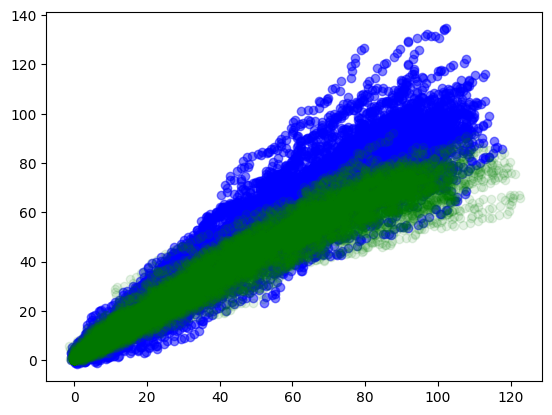

In [12]:
fig, ax = plt.subplots()
ax.scatter(x[0,:,:].reshape(-1,1), x[1,:,:].reshape(-1,1),color='b', alpha=0.5)
ax.scatter(x_biased[0,:,:].reshape(-1,1), x_biased[1,:,:].reshape(-1,1),color='g', alpha=0.1)

0.492361732438488

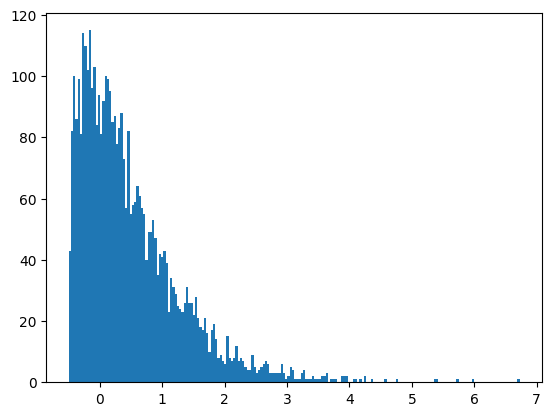

In [13]:
samples = np.random.chisquare(3, 4000)/3 - 0.5
# plt.scatter(np.random.chisquare(3, 1000), 0*samples)
h1 = plt.hist(samples, bins=200)
np.mean(samples)